In [174]:
#RandomForest

In [254]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

In [255]:
train = np.load ('train.npy')
test = np.load ('test.npy')

In [256]:
print(len(train),len(train[0]),len(train[0][0]))

10 270 582


In [257]:
modelo = RandomForestClassifier(n_estimators= 100, max_features= 'auto', max_depth= 140)

In [258]:
x_train = list()
y_train = list()
x_test = list()
y_test = list()
y_prds = list()
y_prds2 = list()
y_test2 = list()
media = 0

#x_train = list()
#y_train = list()

#Entrenamos el modelo dejando fuera un objeto de cada tipo en cada interacción con las particiones ya creadas
for i in range(len(train)):
    x_train = list()
    x_test = list()
    y_train = list()
    y_test = list()
    print("Particion ", i + 1)
    
    y_train = np.array(["carton"]*int(train[i].shape[0]/3) 
                    +  ["plastico"]*int(train[i].shape[0]/3) 
                    +  ["cristal"]*int(train[i].shape[0]/3))
    y_test = np.array(["carton"]*int(test[i].shape[0]/3) 
                   +  ["plastico"]*int(test[i].shape[0]/3) 
                   +  ["cristal"]*int(test[i].shape[0]/3))
    #print(len(y_train[0]))
    x_train = train[i]
    x_test = test[i]
    
    #for j in range(len(train[i])):
    #    x_train.append(train[i][j])
            
    modelo.fit(x_train,y_train)
    print((y_train == modelo.predict(x_train)).mean())
    
    y_prds = modelo.predict(x_test)
    score = metrics.accuracy_score(y_test, y_prds)
    
    y_test2.extend(y_test)
    y_prds2.extend(y_prds)
    
    print('Precisión:',score)
    media += score
    
print("Precisión del modelo: {0: 0.4f}".format(media/len(test)))

Particion  1
1.0
Precisión: 0.4666666666666667
Particion  2
1.0
Precisión: 0.6666666666666666
Particion  3
1.0
Precisión: 0.6
Particion  4
1.0
Precisión: 0.7
Particion  5
1.0
Precisión: 0.8333333333333334
Particion  6
1.0
Precisión: 0.6333333333333333
Particion  7
1.0
Precisión: 0.6666666666666666
Particion  8
1.0
Precisión: 0.6333333333333333
Particion  9
1.0
Precisión: 0.7
Particion  10
1.0
Precisión: 0.7666666666666667
Precisión del modelo:  0.6667


In [ ]:
#Testamos el modelo
y_test2 = list()
y_prds2 = list()
media = 0

for i in range(len(test)):
    
    x_test = list()
    y_test = list()
    
    
    print("Partición ", i + 1)
    y_test = np.array(["carton"]*int(test[i].shape[0]/3) 
                        +  ["plastico"]*int(test[i].shape[0]/3) 
                        +  ["cristal"]*int(test[i].shape[0]/3))
    
    #for j in range(len(test[i])):#30
    x_test = test[i]
    
    y_test2.extend(y_test)

    y_prds = modelo.predict(x_test)
    y_prds2.extend(y_prds)
    #print(len(y_test2),len(y_prds2))
    score = metrics.accuracy_score(y_test, y_prds)
    print('Precisión:',score)
    media += score

print("Precisión del modelo: {0: 0.4f}".format(media/len(test)))

In [259]:
len(y_test2), len(y_prds2)


(300, 300)

In [260]:
#Comparamos la lectura real con la predicción
comp = pd.DataFrame({'real' : y_test2, 'preds' : y_prds2 })
#comp = pd.DataFrame({'real' : y_test, 'p1' : y_prds[0], 'p2' : y_prds[1], 'p3' : y_prds[2], 'p4' : y_prds[3], 'p5' : y_prds[4], 'p6' : y_prds[5], 'p7' : y_prds[6], 'p8' : y_prds[7], 'p9' : y_prds[8], 'p10' : y_prds[9] })
comp

,real,preds
0,carton,carton
1,carton,carton
2,carton,cristal
3,carton,cristal
4,carton,cristal
...,...,...
295,cristal,cristal
296,cristal,cristal
297,cristal,carton
298,cristal,cristal


In [261]:
#Precision de la predicción
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test2, y_prds2)
print("Precisión:", accuracy)

Precisión: 0.6666666666666666


In [262]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import itertools  

In [263]:
cm = confusion_matrix(y_test2, y_prds2)
cm #[carton, cristal, plastico]

array([[63, 17, 20],
       [18, 69, 13],
       [17, 15, 68]], dtype=int64)

In [264]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks([-0.5,0,1,2,2.5], ["","carton","cristal","plastico"])

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalizar matriz de confusion")
    else:
        print('Matriz de confusion')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Matriz de confusion
[[63 17 20]
 [18 69 13]
 [17 15 68]]


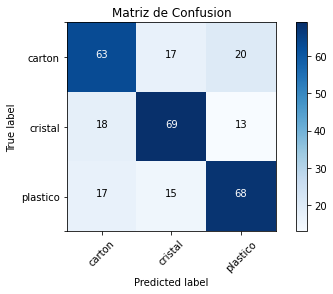

In [265]:
# Plot non-normalized confusion matrix
plt.figure() #num=None, figsize=(8, 6), dpi=80
plot_confusion_matrix(cm, classes= ["carton","cristal","plastico"], title='Matriz de Confusion')

In [266]:
import joblib 

In [267]:
joblib.dump(modelo, 'modeloRandomForest.pkl')

['modeloRandomForest.pkl']

In [268]:
modelo.predict(test[8])

array(['carton', 'carton', 'carton', 'carton', 'carton', 'carton',
       'carton', 'carton', 'carton', 'carton', 'plastico', 'plastico',
       'plastico', 'plastico', 'plastico', 'plastico', 'plastico',
       'plastico', 'plastico', 'plastico', 'cristal', 'cristal',
       'cristal', 'cristal', 'cristal', 'cristal', 'cristal', 'cristal',
       'cristal', 'cristal'], dtype='<U8')

In [269]:
modelo.predict([test[5][6],test[8][10],test[1][29]])

array(['carton', 'plastico', 'cristal'], dtype='<U8')